# **Data Mining Project**: Books Recommendation System

###Import libraries and read csv file

In [ ]:
# Mount our google drive in google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import textwrap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings

Insert file in a dataframe

In [ ]:
# The dataframe is named train_test
location = r'/content/gdrive/MyDrive/DataMining/Project2/books_1.Best_Books_Ever.csv'
train_test = pd.read_csv(location)

### **Data Preprocessing/Cleaning**

In [ ]:
# Drop Nan values from columns used in this part
train_test.dropna(subset=['ratingsByStars', 'genres', 'publishDate'], inplace=True)

# Make a seperate column for each rating
ratings = train_test['ratingsByStars'].str.strip('[]').str.split(',', expand=True)

# For each rating, give the corresponding value and drop NaN rows
train_test['ratingStar5'] = pd.to_numeric(ratings[0].str.replace("'", ""))
train_test.dropna(subset=['ratingStar5'], inplace=True)
train_test['ratingStar5'] = train_test['ratingStar5'].astype(int)

train_test['ratingStar4'] = pd.to_numeric(ratings[1].str.replace("'", ""))
train_test.dropna(subset=['ratingStar4'], inplace=True)
train_test['ratingStar4'] = train_test['ratingStar4'].astype(int)

train_test['ratingStar3'] = pd.to_numeric(ratings[2].str.replace("'", ""))
train_test.dropna(subset=['ratingStar3'], inplace=True)
train_test['ratingStar3'] = train_test['ratingStar3'].astype(int)

train_test['ratingStar2'] = pd.to_numeric(ratings[3].str.replace("'", ""))
train_test.dropna(subset=['ratingStar2'], inplace=True)
train_test['ratingStar2'] = train_test['ratingStar2'].astype(int)

train_test['ratingStar1'] = pd.to_numeric(ratings[4].str.replace("'", ""))
train_test.dropna(subset=['ratingStar1'], inplace=True)
train_test['ratingStar1'] = train_test['ratingStar1'].astype(int)

# Drop rows without genre information
train_test = train_test.drop(train_test[train_test['genres'] == '[]'].index)

# Make a new column out of the first genre for each book
genres = train_test['genres'].str.strip('[]').str.split(',', expand=True)
train_test['genreSingle'] = genres[0]

# Make a new column containing the publication years
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    train_test['publishYear'] = pd.to_datetime(train_test['publishDate'], errors='coerce').dt.year

# Some rows contain irrelevant date data and are transformed to NaN values
train_test.dropna(subset=['publishYear'], inplace=True)
train_test['publishYear'] = train_test['publishYear'].astype(int)


print(train_test[['genres', 'genreSingle']])

                                                  genres    genreSingle
0      ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  'Young Adult'
1      ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...      'Fantasy'
2      ['Classics', 'Fiction', 'Historical Fiction', ...     'Classics'
3      ['Classics', 'Fiction', 'Romance', 'Historical...     'Classics'
4      ['Young Adult', 'Fantasy', 'Romance', 'Vampire...  'Young Adult'
...                                                  ...            ...
52473  ['Vampires', 'Paranormal', 'Young Adult', 'Rom...     'Vampires'
52474                         ['Mystery', 'Young Adult']      'Mystery'
52475  ['Fantasy', 'Young Adult', 'Paranormal', 'Ange...      'Fantasy'
52476  ['Fiction', 'Mystery', 'Historical Fiction', '...      'Fiction'
52477  ['Lds Fiction', 'Historical Fiction', 'Young A...  'Lds Fiction'

[46518 rows x 2 columns]


In [ ]:
print(train_test[['ratingsByStars', 'ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']])

                                          ratingsByStars  ...  ratingStar1
0      ['3444695', '1921313', '745221', '171994', '93...  ...        93557
1      ['1593642', '637516', '222366', '39573', '14526']  ...        14526
2      ['2363896', '1333153', '573280', '149952', '80...  ...        80794
3      ['1617567', '816659', '373311', '113934', '767...  ...        76770
4      ['1751460', '1113682', '1008686', '542017', '5...  ...       548674
...                                                  ...  ...          ...
52473                  ['311', '310', '197', '42', '11']  ...           11
52474                        ['16', '14', '5', '2', '0']  ...            0
52475             ['2109', '1868', '1660', '647', '390']  ...          390
52476                      ['77', '78', '59', '19', '5']  ...            5
52477                     ['106', '73', '42', '17', '8']  ...            8

[46518 rows x 6 columns]


### **Data Analysis**

**1.** Ratings histogram

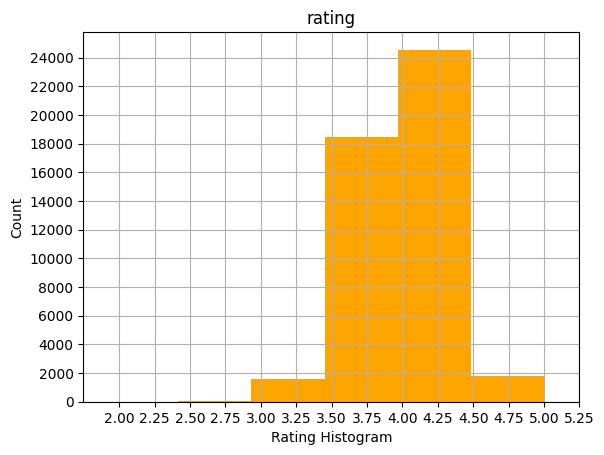

In [ ]:
# Drop NaN values
train_test.dropna(subset=['rating'], inplace=True)

# Make a copy of column
ratings_hist = train_test[['rating']].copy()

# Histogram plot
ratings_hist.hist(color='orange', bins=6)
plt.xlabel('Rating Histogram')
plt.ylabel('Count')
plt.xticks(np.arange(2, 5.5, 0.25))
plt.yticks(np.arange(0, 25000, 2000))
plt.show()

Observation: The average of the books ranges in ratings between 4 and 4.5

**2.** Top 10 books with most pages

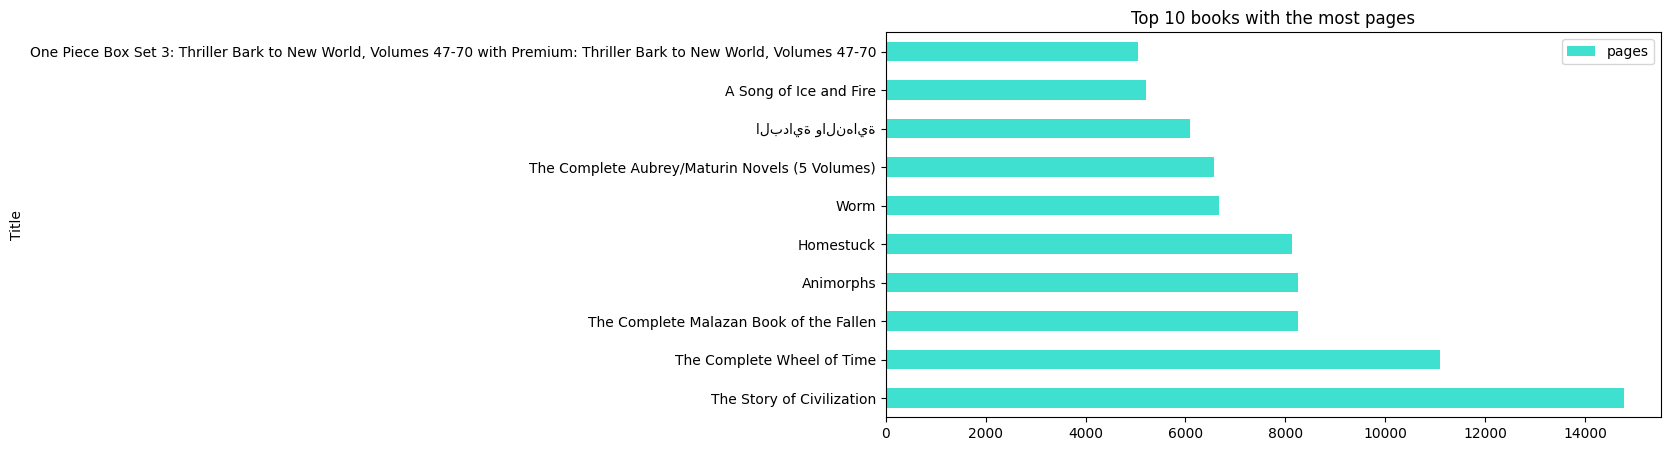

In [ ]:
# Drop NaN values
train_test.dropna(subset=['title', 'pages'], inplace=True)

# Some rows have 'pages' value equal to "1 page"; we will convert these to int
train_test['pages'] = train_test['pages'].replace('1 page', '1', regex=True)
train_test['pages'] = train_test['pages'].astype(int)

# Create a dataframe with 'title' and 'pages'
most_pages = train_test[['title', 'pages']].copy()

# Drop duplicates
most_pages = most_pages.drop_duplicates(subset=['title'])

# Keep top 10 books with the most pages
most_pages = most_pages.nlargest(10, ['pages'])

# Bar plot
most_pages.plot(x ='title', y='pages', kind = 'barh', figsize=(10,5), color='turquoise')
plt.ylabel('Title')
plt.title('Top 10 books with the most pages')
plt.show()

Observation: The above are the 10 books with the most pages, while the largest is 'The Story of Civilization'

**3.** Top 10 books with most 5-star ratings (looking only for books that have received over 10.000 5-star ratings from the column ratinStar5)

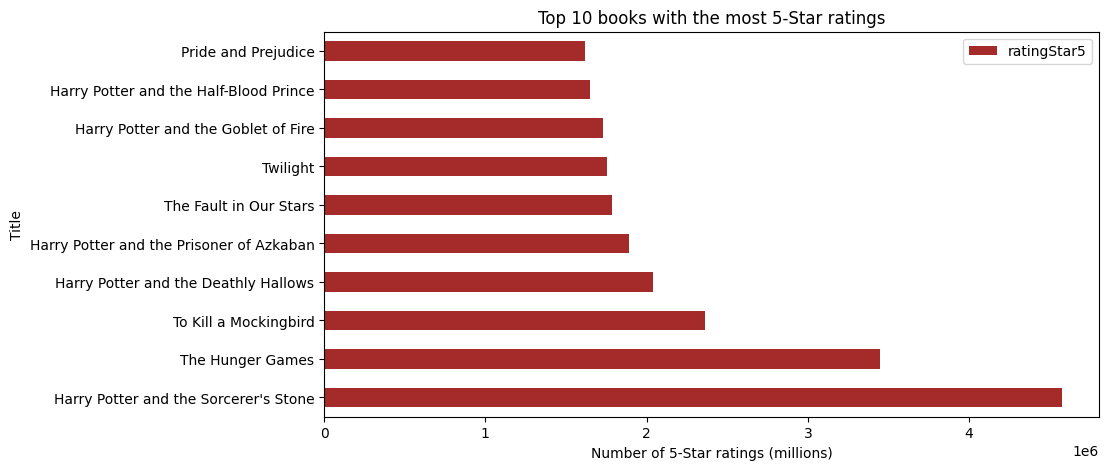

In [ ]:
# Create a dataframe with 'title' and 'ratingStar5'
best_books = train_test[['title', 'ratingStar5']].copy()

# Select books with over 10000 5-Star ratings
best_books = best_books[best_books['ratingStar5'] > 10000]

# Drop duplicates
best_books = best_books.drop_duplicates(subset=['title'])

# Keep top 10 books with the most pages
best_books = best_books.nlargest(10, ['ratingStar5'])

# Bar plot
best_books.plot(x ='title', y='ratingStar5', kind = 'barh', figsize=(10,5), color='brown')
plt.title('Top 10 books with the most 5-Star ratings')
plt.ylabel('Title')
plt.xlabel('Number of 5-Star ratings (millions)')
plt.show()

Observation: The above are the 10 books with the most 5-star ratings, while the title 'Harry Potter and the Sorcerer's Stone' has received the most.

**4.** Top 10 authors with the most ratings

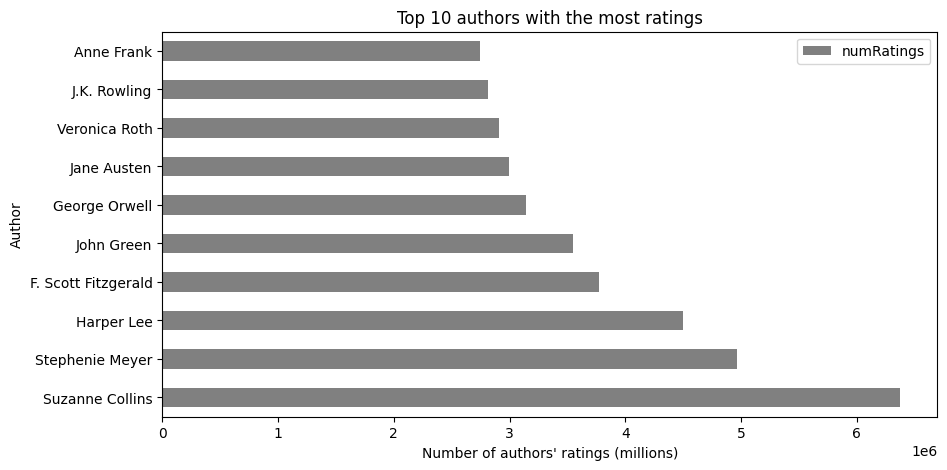

In [ ]:
# Drop NaN values
train_test.dropna(subset=['author', 'numRatings'], inplace=True)

# Create a dataframe with 'author' and 'numRatings'
auth_ratings = train_test[['author', 'numRatings']].copy()

# Drop duplicates
auth_ratings = auth_ratings.drop_duplicates(subset=['author'])

# We want only the main author (delete 'goodreads author' title, translators, assistants, editors  etc)
auth_ratings['author'] = auth_ratings['author'].str.split(',').str[0].str.strip().str.split('(').str[0].str.strip()

# Keep top 10 authors with the most ratings
auth_ratings = auth_ratings.nlargest(10, ['numRatings'])

# Bar plot
auth_ratings.plot(x ='author', y='numRatings', kind = 'barh', figsize=(10,5), color='grey')
plt.title('Top 10 authors with the most ratings')
plt.ylabel('Author')
plt.xlabel('Number of authors\' ratings (millions)')
plt.show()

Obeservation: The above 10 authors have collected the most reviews, with Suzanne Collins being the first

**4.** What are the most frequent languages in which the books have been written?

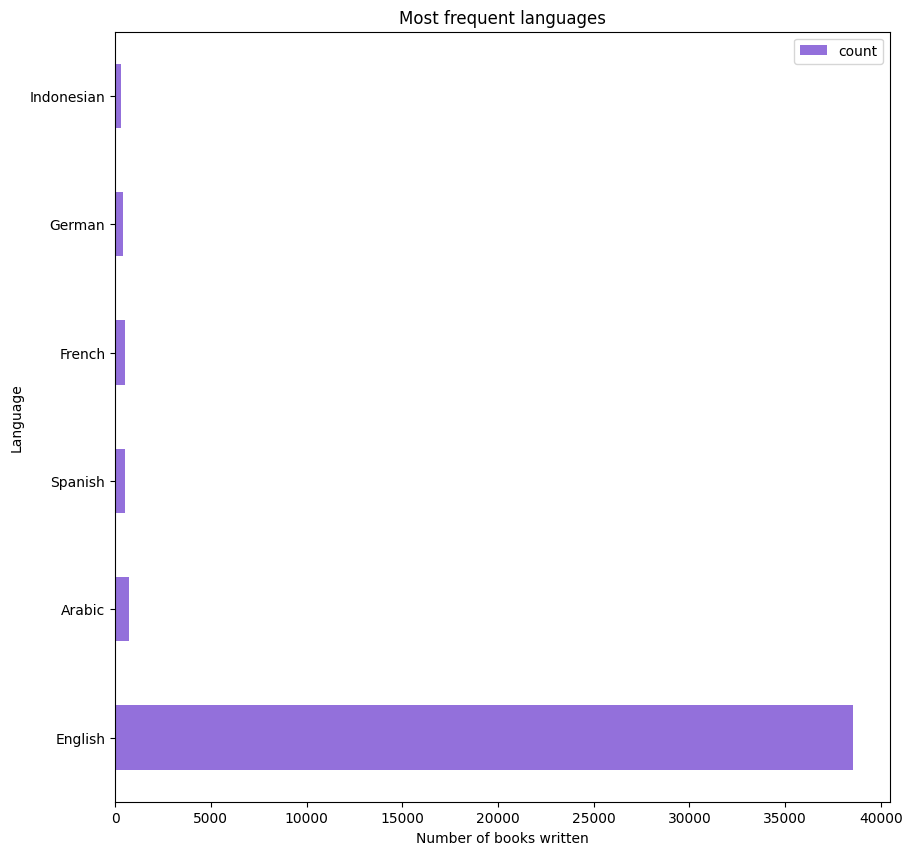

In [ ]:
# Drop NaN values
train_test.dropna(subset=['bookId', 'language'], inplace=True)

# Create a dataframe with 'bookId' and 'language'
freq_lang = train_test[['bookId', 'language']]

# Get unique IDs
freq_lang = freq_lang.drop_duplicates(subset=['bookId'])

# Group by language and count ids
freq_lang['count'] = freq_lang.groupby(['language'])['bookId'].transform('count')

# Drop duplicates
freq_lang = freq_lang.drop_duplicates(subset=['language'] )
freq_lang = freq_lang[['language','count']]

# Keep the top 6
freq_lang = freq_lang.nlargest(6, ['count'])

# Bar plot
freq_lang.plot(x ='language', y='count', kind = 'barh', figsize=(10,10), color='mediumpurple')
plt.title('Most frequent languages')
plt.ylabel('Language')
plt.xlabel('Number of books written')
plt.show()

Observation: The above are the 6 most common languages, with English being by far the most common.

### **Recommendation System Implementation**

In [ ]:
# Extract the ID and convert it to numeric
train_test['bookId'] = train_test['bookId'].str.extract(r'(\d+)')
train_test['bookId'] = pd.to_numeric(train_test['bookId'], errors='coerce')
train_test = train_test.dropna(subset=['bookId'])

# Extract the necessary columns and rows from the original dataframe
new_train_test = train_test.loc[train_test['language'] == 'English', ['bookId', 'description']].copy()

# Define the batch size
batch_size = 1000

# The number of batches is determined by dividing the length of 'new_train_test' - 1 by batch_size
# plus 1 to account for the remaining data that doesn't fit into a full batch
num_batches = (len(new_train_test) - 1) // batch_size + 1

***TF-IDF matrix and Cosine similarity***  
Due to the size of the data, the RAM is exhausted before the process can be completed for all records, so we split the data into batches. We create the TF-IDF matrix and compute the similarity metric for the books within each batch, ultimately exporting a dictionary that maps each book to its 100 most similar counterparts.

*   For unigrams

In [ ]:
# Create an empty dictionary to store the similar books
uni_similar_books = {}

# Create the TfidfVectorizer only for unigrams
uni_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')

# Fit the vectorizer to the entire column
uni_vectorizer.fit(new_train_test['description'].values.astype('U'))

# Process the data in batches
for uni_batch_index in range(num_batches):
    # Select the current batch
    uni_start_index = uni_batch_index * batch_size
    uni_end_index = min((uni_batch_index + 1) * batch_size, len(new_train_test))
    uni_batch_data = new_train_test.iloc[uni_start_index:uni_end_index]

    # Transform the current batch using the fitted vectorizer
    uni_tfidf_matrix = uni_vectorizer.transform(uni_batch_data['description'].values.astype('U'))

    # Calculate the similarity matrix for the current batch
    uni_batch_similarity_matrix = cosine_similarity(uni_tfidf_matrix)

    uni_book_ids = uni_batch_data['bookId'].values

    # Traverse through the books in the current batch
    for uni_book_index in range(len(uni_batch_similarity_matrix)):
        # Select the current book
        uni_book_id = uni_book_ids[uni_book_index]

        # Store the similarity of the book with others
        uni_similarities = list(enumerate(uni_batch_similarity_matrix[uni_book_index]))

        # Sort by similarity score (skip the first item which is self-similarity)
        uni_top_similarities = sorted(uni_similarities, key=lambda x: x[1], reverse=True)[1:101]

        # Store the similar books in a dictionary for each book
        if uni_book_id not in uni_similar_books:
            uni_similar_books[uni_book_id] = {}

        # Iterate the similar books of the current batch
        for uni_similar_book_index, uni_similarity_score in uni_top_similarities:
            # Retrieve the book ID of the similar book
            uni_similar_book_id = uni_book_ids[uni_similar_book_index]
            # Store the similarity score of the similar book with the current book
            uni_similar_books[uni_book_id][uni_similar_book_id] = uni_similarity_score

    # Clear the memory for the current batch
    del uni_tfidf_matrix
    del uni_batch_similarity_matrix

Prints for results observation:

In [ ]:
# For the first 3 books of the unigram dictionary
# print the 5 most similar books
count_books = 0
for uni_book_id, uni_similar in uni_similar_books.items():
    count_similar = 0
    print(f"Book ID: {uni_book_id}")
    print("Most similar books:")
    for uni_similar_book_id, uni_similarity_score in uni_similar.items():
        print(f"- Book ID: {uni_similar_book_id} (Similarity: {uni_similarity_score})")
        count_similar += 1
        if count_similar >= 5:
            break
    count_books += 1
    if count_books >= 3:
        break

Book ID: 2767052
Most similar books:
- Book ID: 7260188 (Similarity: 0.4225939945451928)
- Book ID: 6148028 (Similarity: 0.3696931070279766)
- Book ID: 7938275 (Similarity: 0.1753090509034511)
- Book ID: 60748 (Similarity: 0.0974309790906377)
- Book ID: 9275658 (Similarity: 0.0907733034557588)
Book ID: 2
Most similar books:
- Book ID: 15881 (Similarity: 0.3424617227199878)
- Book ID: 5 (Similarity: 0.31451241315678735)
- Book ID: 3 (Similarity: 0.279604448475422)
- Book ID: 6 (Similarity: 0.22157122708064625)
- Book ID: 1 (Similarity: 0.188905784653675)
Book ID: 2657
Most similar books:
- Book ID: 37781 (Similarity: 0.13035103954445532)
- Book ID: 23878688 (Similarity: 0.09948810659415179)
- Book ID: 18114322 (Similarity: 0.09059816575765968)
- Book ID: 32049 (Similarity: 0.08823629713089731)
- Book ID: 52892857 (Similarity: 0.08799788545913784)


*   For bigrams

In [ ]:
# Create an empty dictionary to store the similar books
bi_similar_books = {}

# Create the TfidfVectorizer only for bigrams
bi_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')

# Fit the vectorizer to the entire column
bi_vectorizer.fit(new_train_test['description'].values.astype('U'))

# Process the data in batches
for bi_batch_index in range(num_batches):
    # Select the current batch
    bi_start_index = bi_batch_index * batch_size
    bi_end_index = min((bi_batch_index + 1) * batch_size, len(new_train_test))
    bi_batch_data = new_train_test.iloc[bi_start_index:bi_end_index]

    # Transform the current batch using the fitted vectorizer
    bi_tfidf_matrix = bi_vectorizer.transform(bi_batch_data['description'].values.astype('U'))

    # Calculate the similarity matrix for the current batch
    bi_batch_similarity_matrix = cosine_similarity(bi_tfidf_matrix)

    bi_book_ids = bi_batch_data['bookId'].values

    # Traverse through the books in the current batch
    for bi_book_index in range(len(bi_batch_similarity_matrix)):
        # Select the current book
        bi_book_id = bi_book_ids[bi_book_index]

        # Store the similarity of the book with others
        bi_similarities = list(enumerate(bi_batch_similarity_matrix[bi_book_index]))

        # Sort by similarity score (skip the first item which is self-similarity)
        bi_top_similarities = sorted(bi_similarities, key=lambda x: x[1], reverse=True)[1:101]

        # Store the similar books in a dictionary for each book
        if bi_book_id not in bi_similar_books:
            bi_similar_books[bi_book_id] = {}

        # Iterate the similar books of the current batch
        for bi_similar_book_index, bi_similarity_score in bi_top_similarities:
            # Retrieve the book ID of the similar book
            bi_similar_book_id = bi_book_ids[bi_similar_book_index]
            # Store the similarity score of the similar book with the current book
            bi_similar_books[bi_book_id][bi_similar_book_id] = bi_similarity_score

    # Clear the memory for the current batch
    del bi_tfidf_matrix
    del bi_batch_similarity_matrix

Prints for results observation:

In [ ]:
# For the first 3 books of the bigram dictionary
# print the 5 most similar books
count_books = 0
for bi_book_id, bi_similar in bi_similar_books.items():
    count_similar = 0
    print(f"Book ID: {bi_book_id}")
    print("Most similar books:")
    for bi_similar_book_id, bi_similarity_score in bi_similar.items():
        print(f"- Book ID: {bi_similar_book_id} (Similarity: {bi_similarity_score})")
        count_similar += 1
        if count_similar >= 5:
            break
    count_books += 1
    if count_books >= 3:
        break

Book ID: 2767052
Most similar books:
- Book ID: 7260188 (Similarity: 0.4225939945451928)
- Book ID: 6148028 (Similarity: 0.3696931070279766)
- Book ID: 7938275 (Similarity: 0.1753090509034511)
- Book ID: 60748 (Similarity: 0.0974309790906377)
- Book ID: 9275658 (Similarity: 0.0907733034557588)
Book ID: 2
Most similar books:
- Book ID: 15881 (Similarity: 0.3424617227199878)
- Book ID: 5 (Similarity: 0.31451241315678735)
- Book ID: 3 (Similarity: 0.279604448475422)
- Book ID: 6 (Similarity: 0.22157122708064625)
- Book ID: 1 (Similarity: 0.188905784653675)
Book ID: 2657
Most similar books:
- Book ID: 37781 (Similarity: 0.13035103954445532)
- Book ID: 23878688 (Similarity: 0.09948810659415179)
- Book ID: 18114322 (Similarity: 0.09059816575765968)
- Book ID: 32049 (Similarity: 0.08823629713089731)
- Book ID: 52892857 (Similarity: 0.08799788545913784)


***Recommendation Functions***
We change the function recommend to uni_recommend for unigrams and bi_recommend for bigrams respectively.

*   For unigrams

In [ ]:
def uni_recommend(item_id, num):
    if item_id not in uni_similar_books:
        print(f"Book ID: {item_id} not found.")
        return

    # Retrieve the title of the item being recommended
    book_title = train_test[train_test['bookId'] == item_id]['title'].values[0]

    print(f"Recommending {num} books similar to: {book_title}")
    print("---------------------------------------------------------")

    count = 0
    # Iterate over the similar books and their similarity scores
    for similar_book_id, similarity_score in uni_similar_books[item_id].items():
        # Retrieve the title and description of the similar book
        book_title = train_test[train_test['bookId'] == similar_book_id]['title'].values[0]
        book_description = train_test[train_test['bookId'] == similar_book_id]['description'].values[0]

        print(f"Recommended: {book_title}")
        # Print the wrapped description (for visibility reasons)
        print("Description:")
        wrapped_description = textwrap.fill(book_description, width=150)
        print(wrapped_description)

        print(f"(score: {similarity_score})\n")

        count += 1
        if count >= num:
            break

*   For bigrams

In [ ]:
def bi_recommend(item_id, num):
    if item_id not in bi_similar_books:
        print(f"Book ID: {item_id} not found.")
        return

    # Retrieve the title of the item being recommended
    book_title = train_test[train_test['bookId'] == item_id]['title'].values[0]
    print(f"Recommending {num} books similar to: {book_title}")
    print("---------------------------------------------------------")

    count = 0
    # Iterate over the similar books and their similarity scores
    for similar_book_id, similarity_score in bi_similar_books[item_id].items():
        # Retrieve the title and description of the similar book
        book_title = train_test[train_test['bookId'] == similar_book_id]['title'].values[0]
        book_description = train_test[train_test['bookId'] == similar_book_id]['description'].values[0]

        print(f"Recommended: {book_title}")

        # Print the wrapped description (for visibility reasons)
        print("Description:")
        wrapped_description = textwrap.fill(book_description, width=150)
        print(wrapped_description)

        print(f"(score: {similarity_score})\n")

        count += 1
        if count >= num:
            break

Tests:

In [ ]:
uni_recommend(2767052, 5)

Recommending 5 books similar to: The Hunger Games
---------------------------------------------------------
Recommended: Mockingjay
Description:
The final book in the ground-breaking HUNGER GAMES trilogy, this new foiled edition of MOCKINGJAY is available for a limited period of time. Against
all odds, Katniss Everdeen has survived the Hunger Games twice. But now that she's made it out of the bloody arena alive, she's still not safe. The
Capitol is angry. The Capitol wants revenge. Who do they think should pay for the unrest? Katniss. And what's worse, President Snow has made it clear
that no one else is safe either. Not Katniss's family, not her friends, not the people of District 12.
(score: 0.4225939945451928)

Recommended: Catching Fire
Description:
SPARKS ARE IGNITING.FLAMES ARE SPREADING.AND THE CAPITAL WANTS REVENGE.Against all odds, Katniss Everdeen has survived the Hunger Games. She and
fellow District 12 tribute Peeta Mellark are miraculously still alive. Katniss should be re

In [ ]:
bi_recommend(2767052, 5)

Recommending 5 books similar to: The Hunger Games
---------------------------------------------------------
Recommended: Mockingjay
Description:
The final book in the ground-breaking HUNGER GAMES trilogy, this new foiled edition of MOCKINGJAY is available for a limited period of time. Against
all odds, Katniss Everdeen has survived the Hunger Games twice. But now that she's made it out of the bloody arena alive, she's still not safe. The
Capitol is angry. The Capitol wants revenge. Who do they think should pay for the unrest? Katniss. And what's worse, President Snow has made it clear
that no one else is safe either. Not Katniss's family, not her friends, not the people of District 12.
(score: 0.4225939945451928)

Recommended: Catching Fire
Description:
SPARKS ARE IGNITING.FLAMES ARE SPREADING.AND THE CAPITAL WANTS REVENGE.Against all odds, Katniss Everdeen has survived the Hunger Games. She and
fellow District 12 tribute Peeta Mellark are miraculously still alive. Katniss should be re

In [ ]:
uni_recommend(2, 3)

Recommending 3 books similar to: Harry Potter and the Order of the Phoenix
---------------------------------------------------------
Recommended: Harry Potter and the Chamber of Secrets
Description:
Ever since Harry Potter had come home for the summer, the Dursleys had been so mean and hideous that all Harry wanted was to get back to the Hogwarts
School for Witchcraft and Wizardry. But just as he’s packing his bags, Harry receives a warning from a strange impish creature who says that if Harry
returns to Hogwarts, disaster will strike.And strike it does. For in Harry’s second year at Hogwarts, fresh torments and horrors arise, including an
outrageously stuck-up new professor and a spirit who haunts the girls’ bathroom. But then the real trouble begins – someone is turning Hogwarts
students to stone. Could it be Draco Malfoy, a more poisonous rival than ever? Could it possible be Hagrid, whose mysterious past is finally told? Or
could it be the one everyone at Hogwarts most suspects… Ha

In [ ]:
bi_recommend(2, 3)

Recommending 3 books similar to: Harry Potter and the Order of the Phoenix
---------------------------------------------------------
Recommended: Harry Potter and the Chamber of Secrets
Description:
Ever since Harry Potter had come home for the summer, the Dursleys had been so mean and hideous that all Harry wanted was to get back to the Hogwarts
School for Witchcraft and Wizardry. But just as he’s packing his bags, Harry receives a warning from a strange impish creature who says that if Harry
returns to Hogwarts, disaster will strike.And strike it does. For in Harry’s second year at Hogwarts, fresh torments and horrors arise, including an
outrageously stuck-up new professor and a spirit who haunts the girls’ bathroom. But then the real trouble begins – someone is turning Hogwarts
students to stone. Could it be Draco Malfoy, a more poisonous rival than ever? Could it possible be Hagrid, whose mysterious past is finally told? Or
could it be the one everyone at Hogwarts most suspects… Ha

### **Classification**

We will build a movie genre classifier from text descriptors using TF-IDF features and 3 machine learning models. After preprocessing the descriptions, we compare Multinomial Naive Bayes, Random Forest and Linear SVC to determine which model best predicts the top 10 genres in the dataset.

In [ ]:
# Import libraries
import re
import nltk
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# NLTK downloads
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Data preparation

In [ ]:
# Select top 10 genres and clean data
top_genres = train_test['genreSingle'].value_counts().head(10).index.tolist()
df = train_test[train_test['genreSingle'].isin(top_genres)].copy()
df = df[['description', 'genreSingle']].dropna()

# Text pre-processing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

df['clean_text'] = df['description'].apply(clean_text)

# Label encoding
label_encoder = LabelEncoder()
df['genreEncoded'] = label_encoder.fit_transform(df['genreSingle'])

# Train/Test split
X_train_text, X_test_text, y_train, y_test = train_test_split(df['clean_text'], df['genreEncoded'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),
    max_features=120000,
    sublinear_tf=True
)

X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# Helper function to train & evalueate model
def evaluate_model(model, model_name="Model"):
    model.fit(X_train, y_train)

    cv_prec = cross_val_score(model, X_train, y_train, cv=10, scoring='precision_weighted').mean()
    cv_rec  = cross_val_score(model, X_train, y_train, cv=10, scoring='recall_weighted').mean()
    cv_f1   = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_weighted').mean()
    cv_acc  = cross_val_score(model, X_train, y_train, cv=10).mean()

    print(f"\n------ {model_name} - Cross Validation ------")
    print("Precision:", cv_prec)
    print("Recall:", cv_rec)
    print("F1 Score:", cv_f1)
    print("Accuracy:", cv_acc)

    # Test set evaluation
    preds = model.predict(X_test)

    print(f"\n------ {model_name} - Test Set Evaluation ------")
    print("Precision:", precision_score(y_test, preds, average='weighted'))
    print("Recall:", recall_score(y_test, preds, average='weighted'))
    print("F1 Score:", f1_score(y_test, preds, average='weighted'))
    print("Accuracy:", accuracy_score(y_test, preds))

#### Naive-Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Filter out the UndefinedMetricWarning and UserWarnings
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)
warnings.filterwarnings('ignore', category=UserWarning)

nb = MultinomialNB()
nb = evaluate_model(nb, "Multinomial Naive Bayes")


------ Multinomial Naive Bayes - Cross Validation ------
Precision: 0.5861721005897076
Recall: 0.44906024096385544
F1 Score: 0.3474167784757686
Accuracy: 0.44906024096385544

------ Multinomial Naive Bayes - Test Set Evaluation ------
Precision: 0.6400985202793807
Recall: 0.4371626831148805
F1 Score: 0.33520396123055085
Accuracy: 0.4371626831148805


#### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

evaluate_model(rf, "Random Forest")


------ Random Forest - Cross Validation ------
Precision: 0.584994187151552
Recall: 0.52655421686747
F1 Score: 0.5195090196606523
Accuracy: 0.52655421686747

------ Random Forest - Test Set Evaluation ------
Precision: 0.5717197703867059
Recall: 0.5212027756360833
F1 Score: 0.5103772625918377
Accuracy: 0.5212027756360833


#### Suport Vector Machines

In [ ]:
from sklearn.svm import LinearSVC

vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,3),
    max_features=150000
)

X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

svm = LinearSVC()
evaluate_model(svm, "Linear SVC")


------ Linear SVC - Cross Validation ------
Precision: 0.7220429976507299
Recall: 0.716289156626506
F1 Score: 0.7128716513505718
Accuracy: 0.716289156626506

------ Linear SVC - Test Set Evaluation ------
Precision: 0.7163647376150162
Recall: 0.7101002313030069
F1 Score: 0.7067408763834918
Accuracy: 0.7101002313030069


#### Results Commentary

Across all experiments, **Linear SVC** outperforms the other models, achieving around 71% accuracy and strong precision/recall balance on both cross-validation and the test set. This matches our expectations, as linear SVMs handle high-dimensional sparse TF-IDF features very efficiently.  
**Random Forest** performs moderately well (~52% accuracy) but still lags behind SVC. This is typical because tree-based models struggle with sparse text data and cannot exploit global linear patterns in feature space.  
**Multinomial Naive Bayes** is the fastest model but also the weakest, with accuracy around 43%, reflecting its limitations with nuance genre signals.  
Overall, the results show that **Linear SVC** is the most suitable model for this genre classification project and further tuning could potentially improve performance even more.